# Multi-armed bandits in a non-stationary problem

The idea of this notebook is to implement a simple testbed to run a non-stationary multiarmed bandits using a constant step-size technique in comparison with the sample average technique

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from IPython.display import clear_output
import pandas as pd
%matplotlib inline

In [2]:
class TestBed:
    def __init__(self, n_actions, scale):
        self.n_actions = n_actions
        self.actions_q_values = np.random.normal(size=n_actions, scale=scale)
        self.initial_action_q_values = self.actions_q_values
        
    def reset_to_initial_q_values(self):
        np.random.seed(655321)
        self.actions_q_values = self.initial_action_q_values
        
    def update_action_values(self):
        self.actions_q_values = self.actions_q_values + np.random.normal(size=self.n_actions, scale=0.01)
        
    def get_reward(self, action):
        return(np.random.normal(self.actions_q_values[action]))
    
    def get_optimal_reward(self):
        return(np.max(self.actions_q_values))
    
    def get_optimal_action(self):
        return(np.argmax(self.actions_q_values))
        

In [3]:
env = TestBed(100, scale=0.75)

## Sample average technique

In [4]:
n = np.ones(env.n_actions)
q = np.zeros(env.n_actions)
rewards = [0]
q_error = [np.mean(np.abs(q-env.actions_q_values))]
actions = [1/env.n_actions]
epsilons = []
lamb = 1-1/10000
epsilon =0.5
optimal_actions = []
optimal_values = []
env.reset_to_initial_q_values()

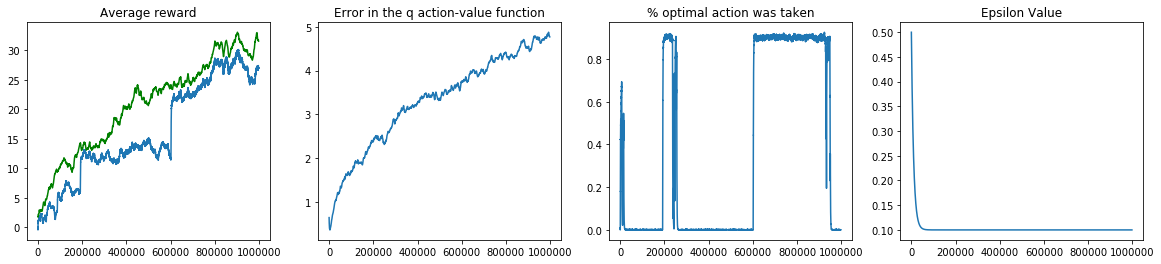

In [5]:
for episode in range(1000000):
    epsilon = epsilon * lamb +  0.1 * (1-lamb) # Epsilon exponential decaying
    rand_epsilon = random.random()
    env.update_action_values()
    if rand_epsilon > epsilon:
        # Greedy
        action = np.argmax(q)
        reward = env.get_reward(action)
    else:
        # Random
        action = random.randint(0, env.n_actions-1)
        reward = env.get_reward(action)
    n[action] = n[action] + 1
    q[action] = q[action] + (1.0/n[action])*(reward-q[action])
    epsilons.append(epsilon)
    actions.append(action==env.get_optimal_action())
    optimal_actions.append(env.get_optimal_action())
    optimal_values.append(env.actions_q_values[env.get_optimal_action()])
    rewards.append(reward)
    q_error.append(np.mean(np.abs(q-env.actions_q_values)))
    if episode % 2000==0:
        clear_output(True)
        plt.figure(figsize=(20,4))
        plt.subplot(141)
        plt.plot(pd.Series(rewards).ewm(span=2000).mean())
        plt.plot(pd.Series(optimal_values).ewm(span=2000).mean(), color="g")
        plt.title("Average reward")
        plt.subplot(142)
        plt.plot(pd.Series(q_error).ewm(span=2000).mean())
        plt.title("Error in the q action-value function")
        plt.subplot(143)
        plt.plot(pd.Series(actions).ewm(span=2000).mean())
        plt.title("% optimal action was taken")
        plt.subplot(144)
        plt.plot(pd.Series(epsilons))
        plt.title("Epsilon Value")

        plt.show()

## Constant step-size

In [6]:
n = np.ones(env.n_actions)
q = np.zeros(env.n_actions)
rewards = [0]
q_error = [np.mean(np.abs(q-env.actions_q_values))]
actions = [1/env.n_actions]
epsilons = []
lamb = 1-1/10000
epsilon =0.5
optimal_actions = [0]
optimal_values = []
alpha = 0.1
env.reset_to_initial_q_values()

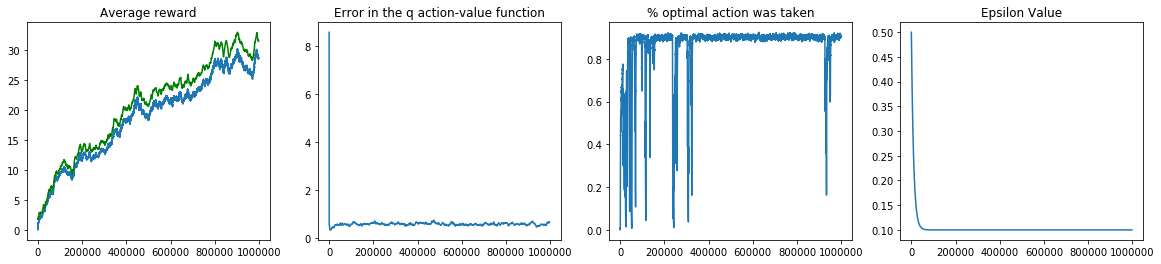

In [7]:
for episode in range(1000000):
    epsilon = epsilon * lamb +  0.1 * (1-lamb) # Epsilon exponential decaying
    rand_epsilon = random.random()
    env.update_action_values()
    if rand_epsilon > epsilon:
        # Greedy
        action = np.argmax(q)
        reward = env.get_reward(action)
    else:
        # Random
        action = random.randint(0, env.n_actions-1)
        reward = env.get_reward(action)
    n[action] = n[action] + 1
    q[action] = q[action] + (alpha)*(reward-q[action])
    epsilons.append(epsilon)
    actions.append(action==env.get_optimal_action())
    optimal_actions.append(env.get_optimal_action())
    optimal_values.append(env.actions_q_values[env.get_optimal_action()])
    rewards.append(reward)
    q_error.append(np.mean(np.abs(q-env.actions_q_values)))
    if episode % 2000==0:
        clear_output(True)
        plt.figure(figsize=(20,4))
        plt.subplot(141)
        plt.plot(pd.Series(rewards).ewm(span=2000).mean())
        plt.plot(pd.Series(optimal_values).ewm(span=2000).mean(), color="g")
        plt.title("Average reward")
        plt.subplot(142)
        plt.plot(pd.Series(q_error).ewm(span=2000).mean())
        plt.title("Error in the q action-value function")
        plt.subplot(143)
        plt.plot(pd.Series(actions).ewm(span=2000).mean())
        plt.title("% optimal action was taken")
        plt.subplot(144)
        plt.plot(pd.Series(epsilons))
        plt.title("Epsilon Value")

        plt.show()